<a href="https://colab.research.google.com/github/shevank/mantenimiento_preventivo/blob/main/Mantenimiento_preventivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

In [112]:
import pandas as pd
from sklearn.preprocessing    import LabelEncoder          # Definir clasificación de una columna Texto Variables Categoricas
import numpy as np
import plotly.express as px
#Importar matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
# Ejercicio
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout

In [113]:
filename = '/content/drive/MyDrive/Data Science 2022/predictive_maintenance.csv' # Excel O CSV

df = pd.read_csv(filename) #csv 

df#Información del df



,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [81]:
#Procedo a ver los nombres de las clases para descartar algún dato mal copiado.
df['Target'].value_counts() # Muestra los tipos de Datos

0    9661
1     339
Name: Target, dtype: int64

In [82]:
#Procedo a ver los nombres de las clases para descartar algún dato mal copiado.
df['Failure Type'].value_counts() # Muestra los tipos de Datos

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [176]:
#Procedo a ver los nombres de las clases para descartar algún dato mal copiado.
df['Failure Type'].value_counts() # Muestra los tipos de Datos

1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type, dtype: int64

In [177]:
clases = ['Heat Dissipation Failure','No Failure','Overstrain Failure','Power Failure','Random Failures','Tool Wear Failure']

In [9]:
#Procedo a ver los nombres de las clases para descartar algún dato mal copiado.
df['Type'].value_counts() # Muestra los tipos de Datos

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [115]:
 # label encoder para locationNormalized
labelencoder = LabelEncoder()

df['Failure Type'] = labelencoder.fit_transform(df['Failure Type'])
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,1
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,1
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,1
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,1


In [116]:
 # label encoder para locationNormalized
labelencoder = LabelEncoder()

df['Type'] = labelencoder.fit_transform(df['Type'])
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,298.8,308.4,1604,29.5,14,0,1
9996,9997,H39410,0,298.9,308.4,1632,31.8,17,0,1
9997,9998,M24857,2,299.0,308.6,1645,33.4,22,0,1
9998,9999,H39412,0,299.0,308.7,1408,48.5,25,0,1


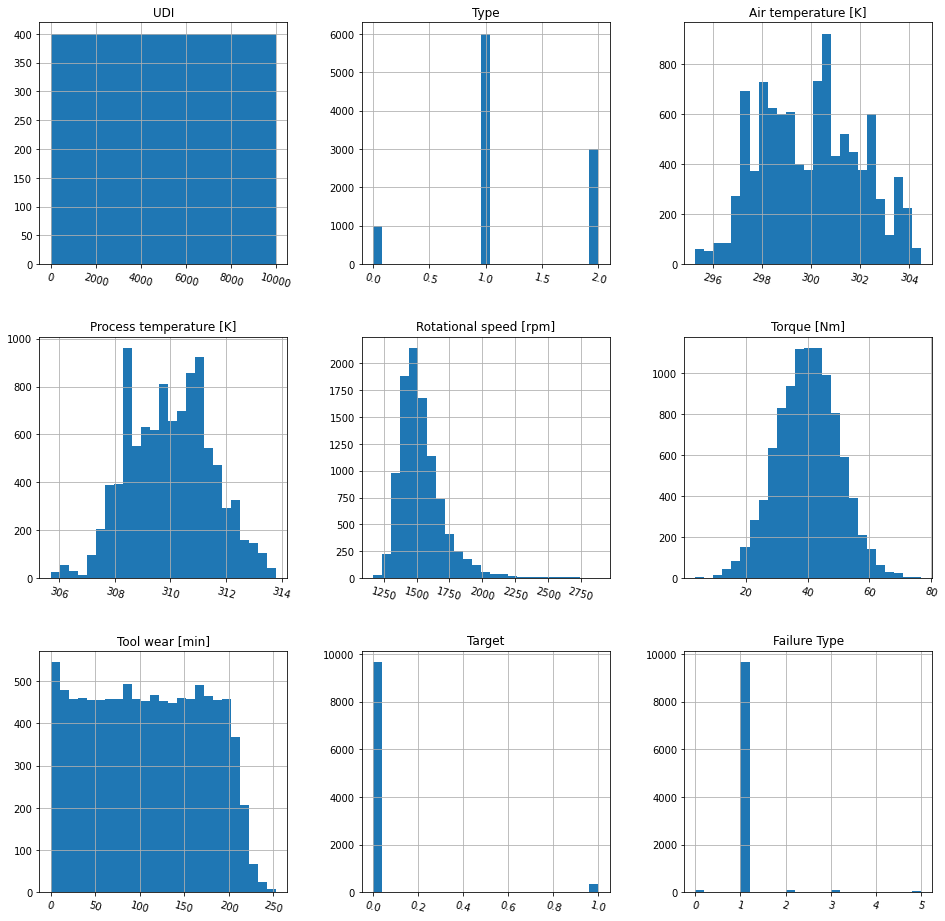

In [11]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [117]:
#Separamos las variables de entrenamiento y test 
df = df.drop(columns=['UDI'])
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M14860,2,298.1,308.6,1551,42.8,0,0,1
1,L47181,1,298.2,308.7,1408,46.3,3,0,1
2,L47182,1,298.1,308.5,1498,49.4,5,0,1
3,L47183,1,298.2,308.6,1433,39.5,7,0,1
4,L47184,1,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...
9995,M24855,2,298.8,308.4,1604,29.5,14,0,1
9996,H39410,0,298.9,308.4,1632,31.8,17,0,1
9997,M24857,2,299.0,308.6,1645,33.4,22,0,1
9998,H39412,0,299.0,308.7,1408,48.5,25,0,1


In [136]:
#Separamos las variables de entrenamiento y test 
X = df.drop(columns=['Product ID','Failure Type'])
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0
9996,0,298.9,308.4,1632,31.8,17,0
9997,2,299.0,308.6,1645,33.4,22,0
9998,0,299.0,308.7,1408,48.5,25,0


In [151]:
# Codificar nuestro objetivo
y = df['Failure Type'].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [152]:
X.shape

(10000, 7)

In [154]:
#Hago el split de datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [155]:
# Escalamiento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [156]:
#Defino las clases 
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [157]:
# Modelo secuencial
model = Sequential()

In [143]:
import tensorflow as tf

In [158]:
# Armado de nuestra red neuronal
model = tf.keras.models.Sequential() # Modelo secuencial
model.add(tf.keras.layers.Flatten(input_shape=[7])) # 
model.add(tf.keras.layers.Dense(300, activation='relu')) # Primera capa oculta, salida 300
model.add(tf.keras.layers.Dense(100, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(7, activation='softmax')) # Capa de salida, salida 10 (número de clases)

In [159]:
# Paso 2: compilar
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc']) # Se utiliza categorical cross entropy ya que es para determinar las distintas clases. En este caso s

In [160]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 7)                 0         
                                                                 
 dense_21 (Dense)            (None, 300)               2400      
                                                                 
 dense_22 (Dense)            (None, 100)               30100     
                                                                 
 dense_23 (Dense)            (None, 7)                 707       
                                                                 
Total params: 33,207
Trainable params: 33,207
Non-trainable params: 0
_________________________________________________________________


In [161]:
# Paso 3: ajustar nuestro modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1758 - acc: 0.9673 - val_loss: 0.0509 - val_acc: 0.9873
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0382 - acc: 0.9904 - val_loss: 0.0433 - val_acc: 0.9900
Epoch 3/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0308 - acc: 0.9923 - val_loss: 0.0387 - val_acc: 0.9913
Epoch 4/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0289 - acc: 0.9933 - val_loss: 0.0388 - val_acc: 0.9917
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0249 - acc: 0.9936 - val_loss: 0.0358 - val_acc: 0.9923
Epoch 6/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0241 - acc: 0.9934 - val_loss: 0.0354 - val_acc: 0.9920
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0216 - acc: 0.9947 - val_loss: 0.0364 - val_acc: 0.9920
Epoch 8/20
219/219 [==============================] - 1s 2ms/step - loss: 0.

In [162]:
score, acc = model.evaluate(X_test, y_test
                            )
print("Score:", score) # Función de pérdida
print("Accuracy:", acc)

94/94 [==============================] - 0s 978us/step - loss: 0.0364 - acc: 0.9960
Score: 0.036388982087373734
Accuracy: 0.9959999918937683


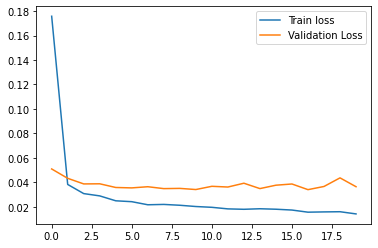

In [164]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

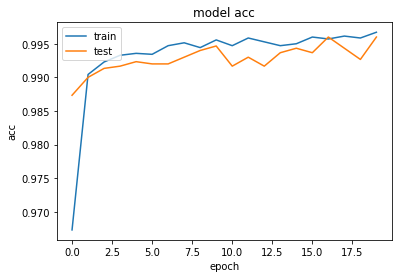

In [165]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [178]:
#Obtengo un for para valores de vistos
for dato in range (1,50,1):

  prediction = model.predict(X_test)
  classes_x=np.argmax(prediction,axis=1)
  print("Predicción:", clases[classes_x[dato]])
  #print("Clase Real:", clases[y_test[dato]])

Predicción: Heat Dissipation Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: Tool Wear Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: No Failure
Predicción: N

In [170]:
prediction = model.predict(X_test)

In [179]:
for index in range(1, 50 ,1):
   
   y1 =  prediction[index] 
   y2 =  y_test[index] 

   pos1 = np.argmax(y1)
   pos2 = np.argmax(y2)
   
   print("Predicción:", clases[pos1])
   print("Clase Real:", clases[pos2])
   print(f"{pos1} ,{pos2} \n")   
   print("\n")

Predicción: Heat Dissipation Failure
Clase Real: No Failure
0 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: Tool Wear Failure
Clase Real: Tool Wear Failure
5 ,5 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No Failure
1 ,1 



Predicción: No Failure
Clase Real: No